# https://tinyurl.com/2p82uuvz

In [129]:
import math

quake_dicts = [{'place': 'southeast of the Loyalty Islands',
  'time': 1637538745422,
  'mag': 4.5,
  'loc': {'lat': -22.7976, 'lon': 171.963}},
 {'place': '5km ESE of Walker, CA',
  'time': 1637537593330,
  'mag': 1.19,
  'loc': {'lat': 38.504, 'lon': -119.429}},
 {'place': '19 km W of Cheyenne Wells, Colorado',
  'time': 1637537565440,
  'mag': 1.9,
  'loc': {'lat': 38.8551, 'lon': -102.5692}},
 {'place': '4 km NW of Point MacKenzie, Alaska',
  'time': 1637537529410,
  'mag': 1.7,
  'loc': {'lat': 61.3898, 'lon': -150.0462}},
 {'place': '15 km SE of Waynoka, Oklahoma',
  'time': 1637537486109,
  'mag': 1.51,
  'loc': {'lat': 36.473, 'lon': -98.7745}}]
        
class Location:
    def __init__(self, lat, lon):
        self.lat = lat
        self.lon = lon
        
    def __str__(self):
        return f"Location: latitude={self.lat}, longitude={self.lon}"

    def __repr__(self):
        return f"Location({self.lat}, {self.lon})"
    
    def __eq__(self, other):
        #return self.lat == other.lat and self.lon == other.lon
        return math.isclose(self.lat, other.lat) and math.isclose(self.lon, other.lon)
        
class Earthquake:
    def __init__(self, values):
        self.place = values["place"]
        self.time = values["time"]
        self.mag = values["mag"]
        self.loc = Location(values["loc"]["lat"], values["loc"]["lon"])

    def place_miles(self):
        place = self.place
        km_idx = place.find("km")
        if km_idx < 0:
            return place
        num = place[:km_idx].strip()
        if not num.isdigit():
            return place
        miles = round(float(num) * 0.621371, 2)
        return f"{miles} miles{place[km_idx+2:]}"
    
    def _repr_html_(self):
        size = max(5 - int(round(self.mag)), 1)
        return f"<h{size}>Mag {self.mag} Earthquake at {self.place}</h{size}>"
    
    def __repr__(self):
        return f"Mag {self.mag} Earthquake at {self.place}"
    
    # lt = "less than", ge = "greater or equal"
    def __lt__(self, obj2):
        return self.mag < obj2.mag

In [130]:
# earthquakes = []
# for q in quake_dicts:
#     earthquakes.append(Earthquake(q))

earthquakes = [Earthquake(q) for q in quake_dicts]
earthquakes

[Mag 4.5 Earthquake at southeast of the Loyalty Islands,
 Mag 1.19 Earthquake at 5km ESE of Walker, CA,
 Mag 1.9 Earthquake at 19 km W of Cheyenne Wells, Colorado,
 Mag 1.7 Earthquake at 4 km NW of Point MacKenzie, Alaska,
 Mag 1.51 Earthquake at 15 km SE of Waynoka, Oklahoma]

In [131]:
earthquakes[0] < earthquakes[1] # calls earthquakes[0].__lt__(earthquakes[1])

False

In [132]:
# new_list = earthquakes.sort() # BAD!
# new_list

In [133]:
# earthquakes.sort()  -- modifies the list to be in order, without creating a new one
new_list = sorted(earthquakes) # doesn't change original list, creates new one
new_list

[Mag 1.19 Earthquake at 5km ESE of Walker, CA,
 Mag 1.51 Earthquake at 15 km SE of Waynoka, Oklahoma,
 Mag 1.7 Earthquake at 4 km NW of Point MacKenzie, Alaska,
 Mag 1.9 Earthquake at 19 km W of Cheyenne Wells, Colorado,
 Mag 4.5 Earthquake at southeast of the Loyalty Islands]

In [134]:
Earthquake(quake_dicts[1])

Mag 1.19 Earthquake at 5km ESE of Walker, CA

In [135]:
Earthquake(quake_dicts[2])

Mag 1.9 Earthquake at 19 km W of Cheyenne Wells, Colorado

In [136]:
Earthquake(quake_dicts[0])

Mag 4.5 Earthquake at southeast of the Loyalty Islands

In [137]:
point1 = Location(36.473, -98.7745)
print(point1)    # call str(point1), which calls point1.__str__()
point1           # calls repr(point1), which calls point1.__repr__()

Location: latitude=36.473, longitude=-98.7745


Location(36.473, -98.7745)

In [138]:
point2 = Location(36.473, -98.77450000001)
point2

Location(36.473, -98.77450000001)

In [139]:
point1 == point2 # calls point1.__eq__(point2)

True

In [140]:
import pandas as pd
pd.DataFrame([[1,2],[3,4]])

,0,1
0,1,2
1,3,4


In [141]:
pd.DataFrame([[1,2],[3,4]])._repr_html_()

'<div>\n<style scoped>\n    .dataframe tbody tr th:only-of-type {\n        vertical-align: middle;\n    }\n\n    .dataframe tbody tr th {\n        vertical-align: top;\n    }\n\n    .dataframe thead th {\n        text-align: right;\n    }\n</style>\n<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>1</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1</td>\n      <td>2</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>3</td>\n      <td>4</td>\n    </tr>\n  </tbody>\n</table>\n</div>'

In [142]:
s = "AB\nCD"
print(s)    # for non-programmers
s           # for programmers

AB
CD


'AB\nCD'

# range sequence

In [143]:
range(5)

range(0, 5)

In [189]:
class Range:
    def __init__(self, v1, v2):
        self.lower = v1
        self.upper = v2
        
    def __getitem__(self, lookup):        
        if not isinstance(lookup, int):
            raise TypeError("only int lookup supported")
        if lookup >= (self.upper - self.lower):
            raise IndexError()
        if lookup < 0:
            raise NotImplementedError("neg idx not supported (yet)")
        return self.lower + lookup
    
    def __len__(self):
        return self.upper - self.lower

r = Range(3, 8)
r

In [190]:
len(r)

5

In [186]:
for x in r:
    print(x)

3
4
5
6
7


In [174]:
r.__getitem__(0)

0
<class 'int'>


3

In [177]:
r[2] # r.__getitem__(???)

5

In [178]:
#r[-1]

In [187]:
list(r)

[3, 4, 5, 6, 7]

In [191]:
len(r) # len(r) calls r.__len__() calls Range.__len__(r)

5

# with statement

In [194]:
f = open("test.txt", "w")
f.write("hello")
# what if I crash here?
assert 1==2
f.write("world")
f.close()

AssertionError: 

In [195]:
with open("test.txt", "w") as f:
    f.write("hello")
    # what if I crash here?
    assert 1==2
    f.write("world")

# f.close()  -- cleanup happens automatically with "with"

AssertionError: 

In [198]:
class Example:
    def __init__(self):
        print("create context manager")
    
    def __enter__(self):
        print("start with block")
        
    def __exit__(self, exc_type, exc_value, traceback):
        print("exit with block")
    

with Example() as obj: # any obj used with "with" is called a "context manager"
    print("A")
    assert 1==2 # crash!
    print("B")

create context manager
start with block
A
exit with block


AssertionError: 

In [200]:
import matplotlib.pyplot as plt

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

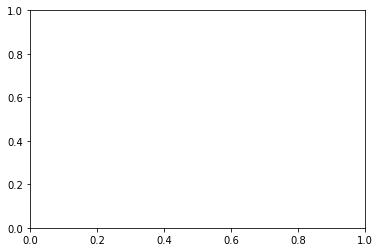

In [203]:
plt.rcParams["font.size"] = 10
plt.subplots()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

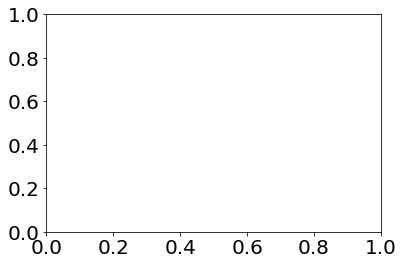

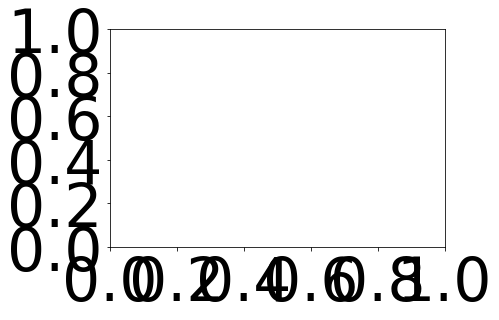

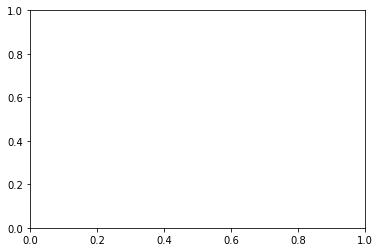

In [209]:
class FontMult:
    def __init__(self, mult):
        self.mult = mult
        
    def __enter__(self):
        plt.rcParams["font.size"] *= self.mult
        
    def __exit__(self, exc_type, exc_value, traceback):
        plt.rcParams["font.size"] /= self.mult

with FontMult(2):
    plt.subplots() # should be double size
    with FontMult(3):
        plt.subplots() # should be 6x size

plt.subplots() # should be normal size again